In [9]:
%load_ext autoreload
%autoreload 2


import matplotlib.pyplot as plt
import numpy as np

import achiralqw as aqw

from achiralqw.graph import QWGraph, QWGraphBuilder as qwgb, QWGraphBuilder
from achiralqw.plotter import plot_qwgraph

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
#the class QWGraphBuilder contains a collection of default static methods that can be used to create simple graphs
for method, v in QWGraphBuilder.__dict__.items():
    print(method)


__module__
graphFromCode
gfc
fromIgraph
fromNetworkx
Ring
Line
Parallel
SquareCut
__dict__
__weakref__
__doc__


Graph codename: C6
Number of Nodes 6
Number of Free phases 1
Phase condensation links : [(4, 5)]
Start state : 0 // Target state : 5


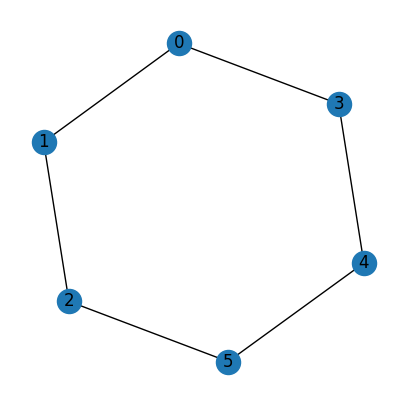

In [11]:

#create a Ring Graph
first_graph = qwgb.Ring(6)

#get properties
print("Graph codename: {}".format(first_graph.code))
print("Number of Nodes {}".format(first_graph.N))
print("Number of Free phases {}".format(first_graph.get_phase_n()))
print("Phase condensation links : {}".format( first_graph.re_coord))
print("Start state : {} // Target state : {}".format(first_graph.start, first_graph.target))
fig, ax = plt.subplots(1,1, figsize= (5,5))

plot_qwgraph(first_graph)


In [12]:

#states have a fuzzy labelling order: for manipulation efficiency the target site has to be the last entry of the matrix
print("Hamiltonian :")
print(first_graph.mat)


Hamiltonian :
[[ 0.+0.j -1.+0.j  0.+0.j -1.+0.j  0.+0.j  0.+0.j]
 [-1.+0.j  0.+0.j -1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j  0.+0.j  0.+0.j  0.+0.j -1.+0.j]
 [-1.+0.j  0.+0.j  0.+0.j  0.+0.j -1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j  0.+0.j -1.+0.j]
 [ 0.+0.j  0.+0.j -1.+0.j  0.+0.j -1.+0.j  0.+0.j]]


In [13]:

# compute eigenvectors and values of the Laplacian 
# note: for manipulation efficiency eigenvectors are not computed automatically upon creation, this has to be kept in mind if you rephase the graph
first_graph.update_eigen()
print("Eigenvectors :")
print(first_graph.eig_vec)

print("Eigenvalues :")
print(first_graph.eig_val)


Eigenvectors :
[[-0.40824829+0.j  0.57735027+0.j  0.        +0.j  0.57735027+0.j
   0.        +0.j  0.40824829+0.j]
 [-0.40824829+0.j  0.28867513+0.j  0.5       +0.j -0.28867513+0.j
   0.5       +0.j -0.40824829+0.j]
 [-0.40824829+0.j -0.28867513+0.j  0.5       +0.j -0.28867513+0.j
  -0.5       +0.j  0.40824829+0.j]
 [-0.40824829+0.j  0.28867513+0.j -0.5       +0.j -0.28867513+0.j
  -0.5       +0.j -0.40824829+0.j]
 [-0.40824829+0.j -0.28867513+0.j -0.5       +0.j -0.28867513+0.j
   0.5       +0.j  0.40824829+0.j]
 [-0.40824829+0.j -0.57735027+0.j  0.        +0.j  0.57735027+0.j
   0.        +0.j -0.40824829+0.j]]
Eigenvalues :
[[-2.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 2.]]


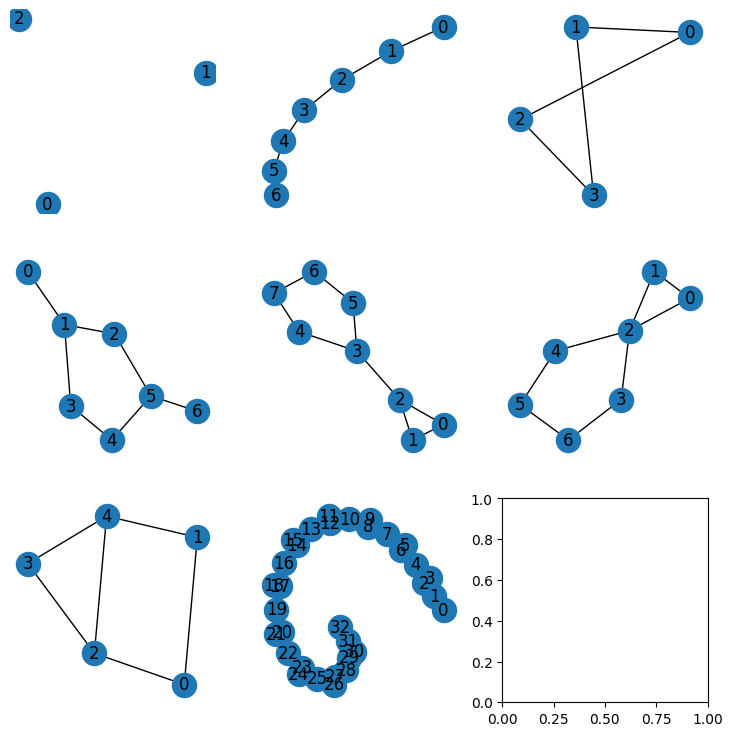

In [14]:
#there are a lot of methods that can be used to compose and modify the graph, obtaining complex structures from simple building blocks

test = QWGraph(3)

#create ring an line graphs
line = qwgb.Line(7)
ring = qwgb.Ring(4)
#may add handles
hring = qwgb.Ring(5, HANDLES = True)


#can add or concatenate
with_link = qwgb.Ring(3) + qwgb.Ring(5) 
no_link = qwgb.Ring(3) | qwgb.Ring(5)

#add an edge to the graph
cut_ring = qwgb.Ring(5).cut([(2,4)])

#or even create a longer chain
a_chain = ring.chain(10)

test_graphs = [test, line, ring ,hring, with_link, no_link, cut_ring, a_chain]

fig, axx = plt.subplots(3,3, figsize = (9,9))


for gr, ax in zip(test_graphs, axx.flat):
    plot_qwgraph(gr,ax = ax)
    

In [20]:
#change phase in the relevant links

#create a 3 free phase graphs

phase3 = qwgb.Ring(4).chain(3, HANDLES = True)

print("Condensed phase link : {}".format(phase3.re_coord))

# vector of phases to apply in radians
new_phases = np.array([.5*np.pi, np.pi, 1.5*np.pi])
phase3.rephase(new_phases)

print("Laplacian :")
print("L[3][4]  and L[4][3] (c.c)\t: {:.3f} {:.3f}".format(phase3.mat[3,4], phase3.mat[4,3]))
print("L[6][7]  and L[7][6]\t\t: {:.3f} {:.3f}".format(phase3.mat[3,4], phase3.mat[4,3]))
print("L[9][10] and L[10][9]\t\t: {:.3f} {:.3f}".format(phase3.mat[3,4], phase3.mat[4,3]))

Condensed phase link : [(3, 4), (6, 7), (9, 10)]
Laplacian :
L[3][4]  and L[4][3] (c.c)	: -0.000-1.000j -0.000+1.000j
L[6][7]  and L[7][6]		: -0.000-1.000j -0.000+1.000j
L[9][10] and L[10][9]		: -0.000-1.000j -0.000+1.000j


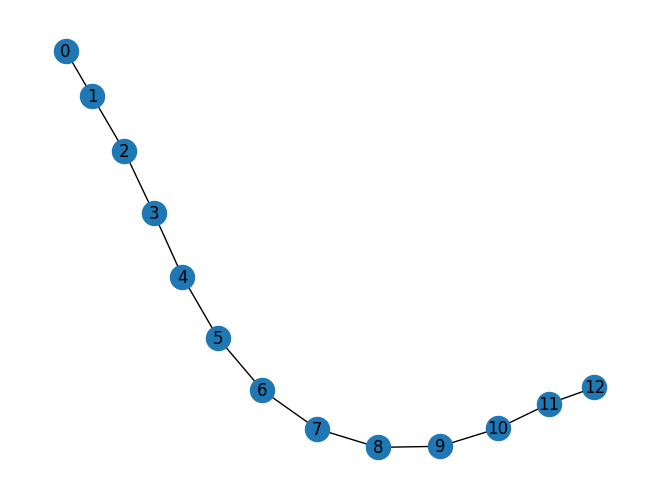

In [19]:
#graph have an internal method to compute the krylov subspace states and coupling

gr =  qwgb.Ring(4).chain(5, HANDLES = True)

#the method return as a tuple the basis states, the energy associated to each basis states, and the coupling between subsequent states
#from these value it is straightforward to build the tridiagonal hamiltonian of the subspace.
k_basis, k_E, k_A = gr.krylov_basis()

#the topology of the resulting transformed graph is in facts a line
k_gr = gr.krylov_transform()
plot_qwgraph(k_gr)